## The goal

### In this notebook we will build a convolutional neural network in order to classify images of handwritten digits


#### 1. First we need to load our data, it's built in into keras library

In [1]:
from keras.datasets import mnist

# load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'Shape of our training data: {x_train.shape}')
print(f'Shape of our training labels: {y_train.shape}')

print(f'Shape of our test data: {x_test.shape}')
print(f'Shape of our test labels: {y_test.shape}')

Using TensorFlow backend.


Shape of our training data: (60000, 28, 28)
Shape of our training labels: (60000,)
Shape of our test data: (10000, 28, 28)
Shape of our test labels: (10000,)


Now let's display some of our images

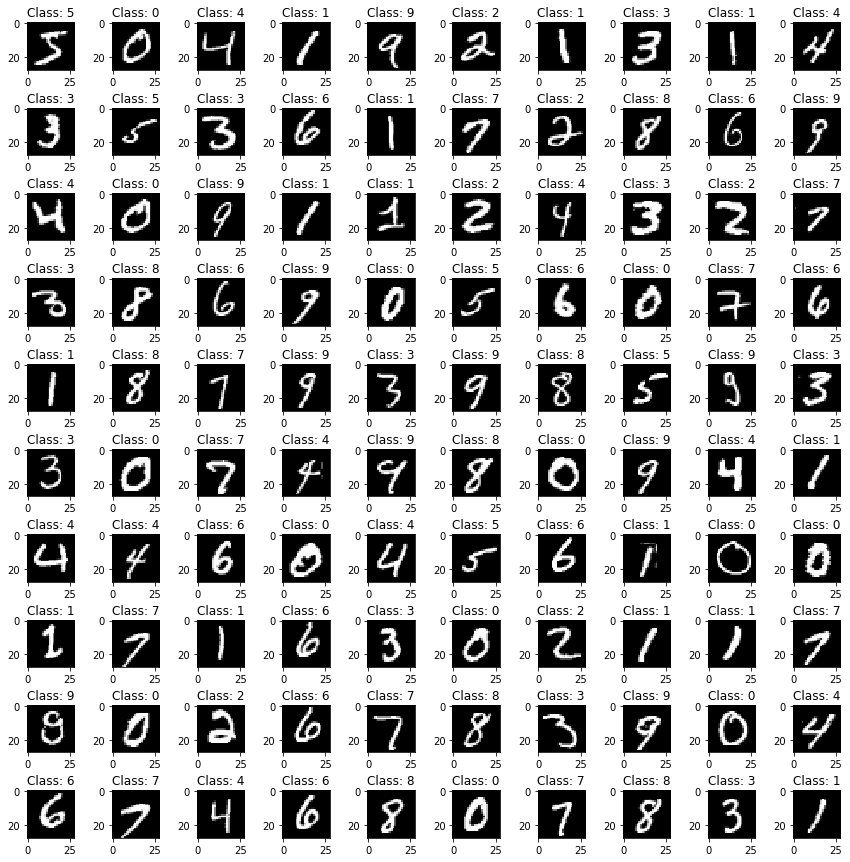

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (15,15))
ax = ax.ravel()

for i in range(0, 100):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title(f'Class: {y_train[i]}')
    
plt.subplots_adjust(hspace=0.8)
    


#### 2. Now lets get our data into shape that Keras expects it to have (we have to add a new dimension ~ 4th)

In [3]:
IMG_WIDTH, IMG_HEIGHT = 28,28
NUM_OF_TRAIN_SAMPLES = 60000
NUM_OF_TEST_SAMPLES = 10000

x_train = x_train.reshape((NUM_OF_TRAIN_SAMPLES, IMG_WIDTH, IMG_HEIGHT, 1))
y_train = y_train.reshape((NUM_OF_TRAIN_SAMPLES, 1))

x_test = x_test.reshape((NUM_OF_TEST_SAMPLES, IMG_WIDTH, IMG_HEIGHT, 1))
y_test = y_test.reshape((NUM_OF_TEST_SAMPLES, 1))

print(f'Shape of our training data: {x_train.shape}')
print(f'Shape of our training labels: {y_train.shape}')

print(f'Shape of our test data: {x_test.shape}')
print(f'Shape of our test labels: {y_test.shape}')

Shape of our training data: (60000, 28, 28, 1)
Shape of our training labels: (60000, 1)
Shape of our test data: (10000, 28, 28, 1)
Shape of our test labels: (10000, 1)


#### 3. We then change the type of x_data to float  in order to next normalize it - we do this because neural nets learn via parameters that are in range from 0 to 1

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# now normalize
x_train /= 255.0
x_test /= 255.0

#### 4. Next step is to one-hot encode the labels - we cannot feed y data in the format [0, 5,3,6,7 ..] into Keras, it's excepting the multiclass data to be one-hot encoded

In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

NUM_OF_CLASSES = y_test.shape[1]
print(f'Number of classes/ Number of columns : {NUM_OF_CLASSES}')


Number of classes/ Number of columns : 10


#### 5. In this step we will build our convolutional neural network and compile it. First layer needs to have additional parameter (input_shape) which is the size and number of channels of single image in a dataset

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import SGD

input_shape = (IMG_WIDTH,IMG_HEIGHT, 1)

# create model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',input_shape =  input_shape))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_CLASSES, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.001), metrics=['accuracy'])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

#### 6. Now is the time to train our created model (verbose parameter - tells us how much information we want to recive during traning and testing )

In [7]:
batch_size = 64
epochs = 10

history = model.fit(x=x_train, y=y_train, epochs = 10, batch_size=batch_size,verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 221us/step - loss: 2.1657 - acc: 0.2844 - val_loss: 1.7734 - val_acc: 0.6579
Epoch 2/10
60000/60000 [==============================] - 9s 152us/step - loss: 1.2338 - acc: 0.6331 - val_loss: 0.5849 - val_acc: 0.8589
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.7100 - acc: 0.7796 - val_loss: 0.3951 - val_acc: 0.8929
Epoch 4/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.5751 - acc: 0.8219 - val_loss: 0.3331 - val_acc: 0.9075
Epoch 5/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.5109 - acc: 0.8427 - val_loss: 0.2978 - val_acc: 0.9164
Epoch 6/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.4665 - acc: 0.8551 - val_loss: 0.2726 - val_acc: 0.9233
Epoch 7/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.4312 - acc: 0.8669 - val_loss: 0.2536 -

#### 7. Visualize our model in a nicer way than using model.summary

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True) # -> this will by default save image to png

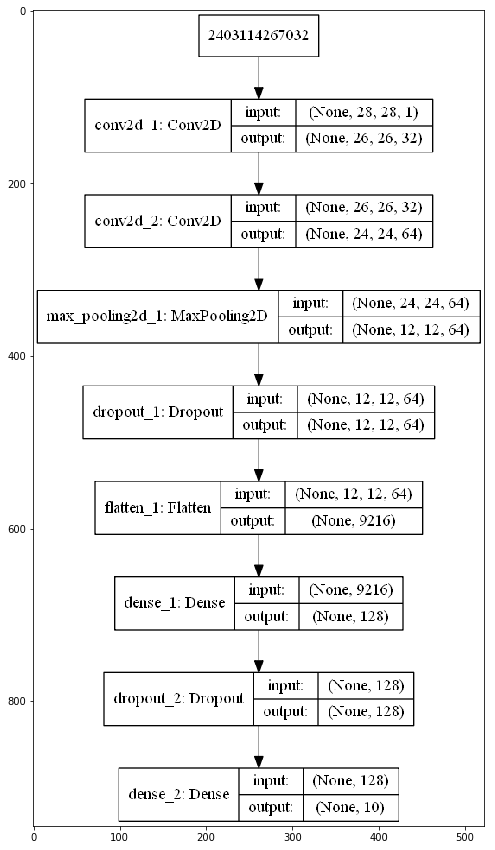

In [9]:
import cv2 

img = cv2.imread('model.png',1)
plt.figure(figsize=(30,15))
plt.imshow(img)

#### 8. Lets now analyze our model

In [10]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<class 'range'>


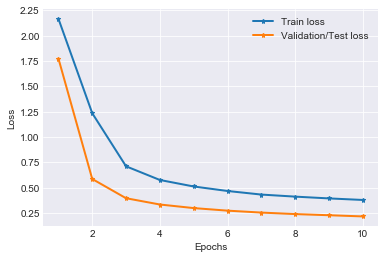

In [11]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_as_list = range(1, len(loss_values) +1)

print(type(epochs_as_list))

plt.style.use('seaborn-darkgrid')

train_loss_line = plt.plot(epochs_as_list, loss_values, label = 'Train loss' )
test_loss_line = plt.plot(epochs_as_list, val_loss_values, label = 'Validation/Test loss' )

plt.setp(train_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)
plt.setp(test_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

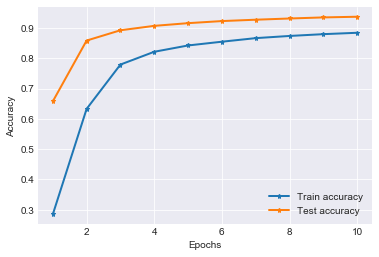

In [12]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

train_acc_line = plt.plot(epochs_as_list, acc_values, label='Train accuracy')
test_acc_line = plt.plot(epochs_as_list, val_acc_values, label='Test accuracy')

plt.setp(train_acc_line, linewidth = 2.0, marker = '*', markersize =5.0)
plt.setp(test_acc_line, linewidth=2.0, marker= '*', markersize = 5.0)


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.93      0.93      1010
           4       0.94      0.93      0.93       982
           5       0.94      0.90      0.92       892
           6       0.94      0.96      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.91      0.92      0.92       974
           9       0.91      0.92      0.92      1009

   micro avg       0.94      0.94      0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



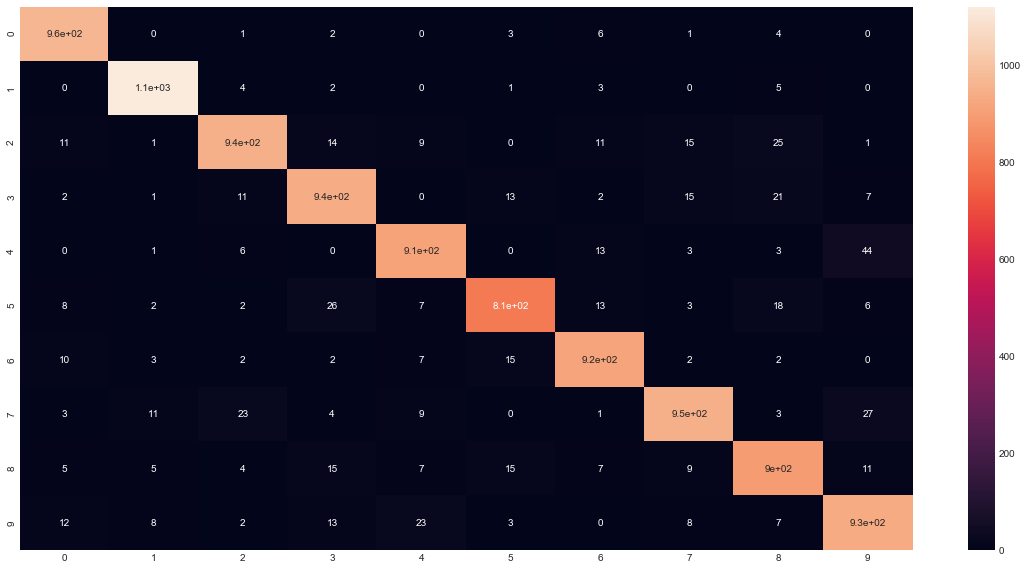

In [15]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # np.argmax because our labels were one hot encoded
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True)